# Covid 19 Death / Confirmed EDA

I realized this EDA while being inspired by the 2 notebooks:

https://www.kaggle.com/imdevskp/covid-19-analysis-visualization-comparisons

https://www.kaggle.com/vanshjatana/analysis-and-prediction-on-coronavirus-italy

which proposes a method of in-depth analysis of the evolution of the virus.

I downloaded the data from the site:

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

which updates the evolution of the epidemic every day in all the countries of the world

# library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from IPython.display import display
import tqdm
from IPython.core.display import HTML
import plotly.offline as py

sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pic2tail/pic2.jpg
/kaggle/input/covid19geographic/COVID-19-geographic-disbtribution-worldwide-2020-04-08.xlsx
/kaggle/input/pic1header/pic1.jpg
/kaggle/input/worldcountries/world-countries


# Dataset

In [2]:
Data = pd.read_excel('../input/covid19geographic/COVID-19-geographic-disbtribution-worldwide-2020-04-08.xlsx')

In [3]:
display(Data.head(5))
display(Data.describe())
print("Number of Country_Region: ", Data['countriesAndTerritories'].nunique())
print("Dates go from day", min(Data['dateRep']), "to day", max(Data['dateRep']), ", a total of", Data['dateRep'].nunique(), "days")
print("Number total of Deaths", Data['deaths'].sum())
print("Number total of Cases", Data['cases'].sum())

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-04-08    8      4  2020     30       4             Afghanistan    AF   
1 2020-04-07    7      4  2020     38       0             Afghanistan    AF   
2 2020-04-06    6      4  2020     29       2             Afghanistan    AF   
3 2020-04-05    5      4  2020     35       1             Afghanistan    AF   
4 2020-04-04    4      4  2020      0       0             Afghanistan    AF   

  countryterritoryCode  popData2018  
0                  AFG   37172386.0  
1                  AFG   37172386.0  
2                  AFG   37172386.0  
3                  AFG   37172386.0  
4                  AFG   37172386.0

day        month         year         cases       deaths  \
count  9513.000000  9513.000000  9513.000000   9513.000000  9513.000000   
mean     15.548828     2.591822  2019.992957    146.314517     8.564911   
std       9.427045     1.284901     0.083631   1141.114073    71.611262   
min       1.000000     1.000000  2019.000000     -9.000000     0.000000   
25%       7.000000     2.000000  2020.000000      0.000000     0.000000   
50%      16.000000     3.000000  2020.000000      0.000000     0.000000   
75%      24.000000     3.000000  2020.000000     13.000000     0.000000   
max      31.000000    12.000000  2020.000000  34272.000000  2004.000000   

        popData2018  
count  9.370000e+03  
mean   6.431196e+07  
std    2.015642e+08  
min    1.000000e+03  
25%    3.545883e+06  
50%    1.062716e+07  
75%    4.272314e+07  
max    1.392730e+09

Number of Country_Region:  204
Dates go from day 2019-12-31 00:00:00 to day 2020-04-08 00:00:00 , a total of 100 days
Number total of Deaths 81478
Number total of Cases 1391890


# increased Cases / Deaths

## Global increase Cases / Deaths

In [4]:
fig = px.line(pd.melt(Data, id_vars=['dateRep'], value_vars=['cases', 'deaths']).groupby(['dateRep', 'variable']).sum().reset_index(),
              x='dateRep',  y="value", color = 'variable',
             title='Daily increase Death / Cases',
             labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count'},)
fig.update_layout(hovermode="x")
fig.show()

## Increased Cases for each Country

In [5]:
# sns.lineplot(x="dateRep", y="cases", hue="countriesAndTerritories", data=Data)

fig = px.line(Data, x="dateRep", y="cases", color='countriesAndTerritories', title='Daily increase Cases by Country',
             labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count'},)
fig.show()

## Increased Deaths for each Country

In [6]:
fig = px.line(Data, x="dateRep", y="deaths", color='countriesAndTerritories', title='Daily increase Deaths by Country',
             labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count'},)
fig.show()

# Data Preprocess

In [7]:
Data.sort_values(by=['dateRep'], inplace = True)

Data['total_cases'] = Data['cases'].cumsum()
Data['total_deaths'] = Data['deaths'].cumsum()

Data['total_cases_ByCountry'] = Data.groupby(['countriesAndTerritories'])['cases'].cumsum()
Data['total_deaths_ByCountry'] = Data.groupby(['countriesAndTerritories'])['deaths'].cumsum()


display(Data.head())
display(Data.tail())

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
5049 2019-12-31   31     12  2019      0       0                  Kuwait   
6588 2019-12-31   31     12  2019      0       0         North_Macedonia   
7494 2019-12-31   31     12  2019      0       0                  Russia   
6886 2019-12-31   31     12  2019      0       0                Pakistan   
3118 2019-12-31   31     12  2019      0       0                 Finland   

     geoId countryterritoryCode  popData2018  total_cases  total_deaths  \
5049    KW                  KWT    4137309.0            0             0   
6588    MK                  MKD    2082958.0            0             0   
7494    RU                  RUS  144478050.0            0             0   
6886    PK                  PAK  212215030.0            0             0   
3118    FI                  FIN    5518050.0            0             0   

      total_cases_ByCountry  total_deaths_ByCountry  
5049                      0                       0  
6588                      0                       0  
7494                      0                       0  
6886                      0                       0  
3118                      0                       0

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
9377 2020-04-08    8      4  2020      6       0                 Vietnam   
8593 2020-04-08    8      4  2020      3       0                  Taiwan   
273  2020-04-08    8      4  2020      0       0     Antigua_and_Barbuda   
4488 2020-04-08    8      4  2020     11       0             Isle_of_Man   
0    2020-04-08    8      4  2020     30       4             Afghanistan   

     geoId countryterritoryCode  popData2018  total_cases  total_deaths  \
9377    VN                  VNM   95540395.0      1391846         81474   
8593    TW                  TWN   23780452.0      1391849         81474   
273     AG                  ATG      96286.0      1391849         81474   
4488    IM                  IMN      84077.0      1391860         81474   
0       AF                  AFG   37172386.0      1391890         81478   

      total_cases_ByCountry  total_deaths_ByCountry  
9377                    251                       0  
8593                    376                       5  
273                      15                       0  
4488                    150                       1  
0                       367                      11

# Expansion of Cases / Deaths

## Global Expansion of Cases / Deaths

In [8]:
fig = px.line(pd.melt(Data, id_vars=['dateRep'], value_vars=['total_cases', 'total_deaths']).groupby(['dateRep', 'variable']).max().reset_index(),
              x='dateRep',  y="value", color = 'variable',
             title='Cummulated Death / Cases',
              labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count'},)
fig.update_layout(hovermode="x")
fig.show()

## expanding Cases for each Country

In [9]:
fig = px.line(Data, x="dateRep", y="total_cases_ByCountry", color='countriesAndTerritories', title='Cummulated Cases by Country',
              labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count'},)
fig.show()

## expanding Deaths for each Country

In [10]:
fig = px.line(Data, x="dateRep", y="total_deaths_ByCountry", color='countriesAndTerritories', title='Cummulated Cases by Country',
              labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count'},)
fig.show()

# Data Preprocess

In [11]:
Data['total_Cases_log10'] = np.log10(np.where(Data['total_cases']<=0 , 1, Data['total_cases']))
Data['total_Deaths_log10'] = np.log10(np.where(Data['total_deaths']<=0 , 1,Data['total_deaths']))

Data['total_Cases_ByCountry_log10'] = np.log10(np.where(Data['total_Cases_log10']<=0 , 1,Data['total_cases_ByCountry']))
Data['total_Death_ByCountry_log10'] = np.log10(np.where(Data['total_Deaths_log10']<=0 , 1,Data['total_deaths_ByCountry']))

display(Data.head())
display(Data.tail())

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
5049 2019-12-31   31     12  2019      0       0                  Kuwait   
6588 2019-12-31   31     12  2019      0       0         North_Macedonia   
7494 2019-12-31   31     12  2019      0       0                  Russia   
6886 2019-12-31   31     12  2019      0       0                Pakistan   
3118 2019-12-31   31     12  2019      0       0                 Finland   

     geoId countryterritoryCode  popData2018  total_cases  total_deaths  \
5049    KW                  KWT    4137309.0            0             0   
6588    MK                  MKD    2082958.0            0             0   
7494    RU                  RUS  144478050.0            0             0   
6886    PK                  PAK  212215030.0            0             0   
3118    FI                  FIN    5518050.0            0             0   

      total_cases_ByCountry  total_deaths_ByCountry  total_Cases_log10  \
5049                      0                       0                0.0   
6588                      0                       0                0.0   
7494                      0                       0                0.0   
6886                      0                       0                0.0   
3118                      0                       0                0.0   

      total_Deaths_log10  total_Cases_ByCountry_log10  \
5049                 0.0                          0.0   
6588                 0.0                          0.0   
7494                 0.0                          0.0   
6886                 0.0                          0.0   
3118                 0.0                          0.0   

      total_Death_ByCountry_log10  
5049                          0.0  
6588                          0.0  
7494                          0.0  
6886                          0.0  
3118                          0.0

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
9377 2020-04-08    8      4  2020      6       0                 Vietnam   
8593 2020-04-08    8      4  2020      3       0                  Taiwan   
273  2020-04-08    8      4  2020      0       0     Antigua_and_Barbuda   
4488 2020-04-08    8      4  2020     11       0             Isle_of_Man   
0    2020-04-08    8      4  2020     30       4             Afghanistan   

     geoId countryterritoryCode  popData2018  total_cases  total_deaths  \
9377    VN                  VNM   95540395.0      1391846         81474   
8593    TW                  TWN   23780452.0      1391849         81474   
273     AG                  ATG      96286.0      1391849         81474   
4488    IM                  IMN      84077.0      1391860         81474   
0       AF                  AFG   37172386.0      1391890         81478   

      total_cases_ByCountry  total_deaths_ByCountry  total_Cases_log10  \
9377                    251                       0           6.143591   
8593                    376                       5           6.143592   
273                      15                       0           6.143592   
4488                    150                       1           6.143596   
0                       367                      11           6.143605   

      total_Deaths_log10  total_Cases_ByCountry_log10  \
9377            4.911019                     2.399674   
8593            4.911019                     2.575188   
273             4.911019                     1.176091   
4488            4.911019                     2.176091   
0               4.911040                     2.564666   

      total_Death_ByCountry_log10  
9377                         -inf  
8593                     0.698970  
273                          -inf  
4488                     0.000000  
0                        1.041393

# Log10 Expansion of Cases / Deaths

I applied Log10 on the expenssion to reduce the significant differences in deaths and cases between the most affected and least affected countries.

This reduction will serve to better perceive the evolution of cases and deaths and to be able to find a possible relationship between them.

## Log10 Global Expansion of Cases / Deaths

In [12]:
fig = px.line(pd.melt(Data, id_vars=['dateRep'], value_vars=['total_Cases_log10', 'total_Deaths_log10']).groupby(['dateRep', 'variable']).max().reset_index(),
              x='dateRep',  y="value", color = 'variable',
             title='Log Cummulated Death / Cases World',
             labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count (Log10)'},)
fig.update_layout(hovermode="x")
fig.show()

## Log10 Expanding Cases for each Country

In [13]:
fig = px.line(Data, x="dateRep", y="total_Cases_ByCountry_log10", color='countriesAndTerritories', title='Log Cummulated Cases by Country',
             labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count (Log10)'},)
fig.show()

## Log10 Expanding Death for each Country

In [14]:
fig = px.line(Data, x="dateRep", y="total_Death_ByCountry_log10", color='countriesAndTerritories', title='Log Cummulated Deaths by Country',
              labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count (Log10)'},)
fig.show()

# Total Cases / Deaths for each Country

## Total Cases for each Country

In [15]:
fig = px.pie(Data.groupby(['countriesAndTerritories']).max().reset_index(), values='total_cases_ByCountry', names='countriesAndTerritories', title='Total Cases by Country',
             labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count (Log10)'},)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Total Deaths for each Country

In [16]:
fig = px.pie(Data.groupby(['countriesAndTerritories']).max().reset_index(), values='total_deaths_ByCountry', names='countriesAndTerritories', title='Total Deaths by Country',
            labels={'deaths_cumsum_ByCountry':'COVID 19 Total Deaths',
                      'cases_cumsum' : 'Cases', 
                      'deaths_cumsum': 'Deaths',
                     'variable' : 'Eolution',
                     'dateRep_usa': 'Date',
                     'dateRep': 'Date',
                     'countriesAndTerritories' : 'Country',
                     'countryterritoryCode': 'Country code',
                     'value' : 'Count (Log10)'},)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Current deaths / cases around the world

## Current cases around the world

In [17]:
country_geo = '../input/worldcountries/world-countries'

m = folium.Map(location=[40, 40], zoom_start=2)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=Data.groupby(['countryterritoryCode']).max().reset_index(),
    columns=['countryterritoryCode', 'total_cases_ByCountry'],
    key_on='feature.id',
    fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
    popup='cases_cumsum_ByCountry',
    nan_fill_color='white',
    legend_name='COVID 19 Total Cases'
).add_to(m)

folium.LayerControl().add_to(m)

display(m)

## Current deaths around the world

In [18]:
m = folium.Map(location=[40, 40], zoom_start=2)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=Data.groupby(['countryterritoryCode']).max().reset_index(),
    columns=['countryterritoryCode', 'total_deaths_ByCountry'],
    key_on='feature.id',
    fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
    nan_fill_color='white',
    legend_name='COVID 19 Total Deaths'
).add_to(m)

folium.LayerControl().add_to(m)

display(m)

# Data Preprocess

In [19]:
def reindex_by_date(df):
    dates = pd.date_range(df.index.min(), df.index.max())
    return df.reindex(dates).bfill()

appended_data = []

for i in Data['countryterritoryCode'].unique():
    tmp = Data[Data['countryterritoryCode'] == i].groupby(['dateRep']).max().apply(reindex_by_date).reset_index().copy()
    appended_data.append(tmp)

Data_new = pd.concat(appended_data)
Data_new['dateRep_usa'] = Data_new['index'].dt.strftime('%m/%d/%Y')

## Deaths / cases ratio for each country

In [20]:
x = Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()['dateRep_usa'].max()

fig = px.scatter(Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()[
                (Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()['total_cases_ByCountry'] > 0)&
                (Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()['index'] == Data_new['index'].max())], 
                 x='total_cases_ByCountry', y='total_deaths_ByCountry', color='countryterritoryCode', size='total_Cases_ByCountry_log10', height=700,
                 text='countriesAndTerritories', log_x=True, log_y=True, title='Deaths vs Cases (Scale is in log10)',
                 labels={'cases_cumsum_ByCountry':'COVID 19 Total Cases',
                                  'dateRep_usa': 'Date',
                                  'countriesAndTerritories' : 'Country',
                                  'countryterritoryCode': 'Country code'},
                )
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

# Evolution of Deaths / Cases worldwide

## Evolution of Cases Worldwide

In [21]:
data_tmp1 = Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()[Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()['total_cases_ByCountry'] > 0].sort_values(by=['dateRep_usa'])
data_tmp2 = Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()[Data_new.groupby(['dateRep_usa', 'countryterritoryCode']).max().reset_index()['total_deaths_ByCountry'] > 0].sort_values(by=['dateRep_usa'])
data_tmp1['countriesAndTerritories2'] = data_tmp1['countriesAndTerritories'].str.replace('_', ' ')
data_tmp2['countriesAndTerritories2'] = data_tmp2['countriesAndTerritories'].str.replace('_', ' ')


max1 = Data.groupby(['countryterritoryCode', 'dateRep']).max().reset_index()['total_cases_ByCountry'].max()
max2 = Data.groupby(['countryterritoryCode', 'dateRep']).max().reset_index()['total_deaths_ByCountry'].max()

In [22]:
fig = px.choropleth(data_tmp1, locations="countriesAndTerritories2", locationmode='country names', 
                     color="total_cases_ByCountry", 
                     hover_name="countriesAndTerritories2",
                     hover_data = ['countriesAndTerritories','dateRep_usa'],
                     projection="mercator",
                     animation_frame="dateRep_usa",
                     color_continuous_scale='Sunsetdark',
                     range_color=[0,max1],
                     labels={'total_cases_ByCountry':'COVID 19 Total Cases',
                          'dateRep_usa': 'Date',
                          'countriesAndTerritories' : 'Country',
                          'countryterritoryCode': 'Country code'},
                     title='Evolution of Cases Worldwide',
                   width=1500, height=700,)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

## Evolution of deaths worldwide

In [23]:
fig = px.choropleth(data_tmp2, locations="countriesAndTerritories2", locationmode='country names', 
                     color="total_deaths_ByCountry", 
                     hover_name="countriesAndTerritories2",
                     hover_data = ['countriesAndTerritories','dateRep_usa'],
                     projection="mercator",
                     animation_frame="dateRep_usa",
                     color_continuous_scale='Sunsetdark',
                     range_color=[0,max2],
                     labels={'total_cases_ByCountry':'COVID 19 Total Cases',
                          'dateRep_usa': 'Date',
                          'countriesAndTerritories' : 'Country',
                          'countryterritoryCode': 'Country code'},
                     title='Evolution of deaths worldwide',
                   width=1500, height=700,)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

https://app.flourish.studio/visualisation/1571387/edit

In [24]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

<h1 style="color:red;"> ================= UPVOTE IF YOU ENJOY IT =) =================</h1> <br /> <br />




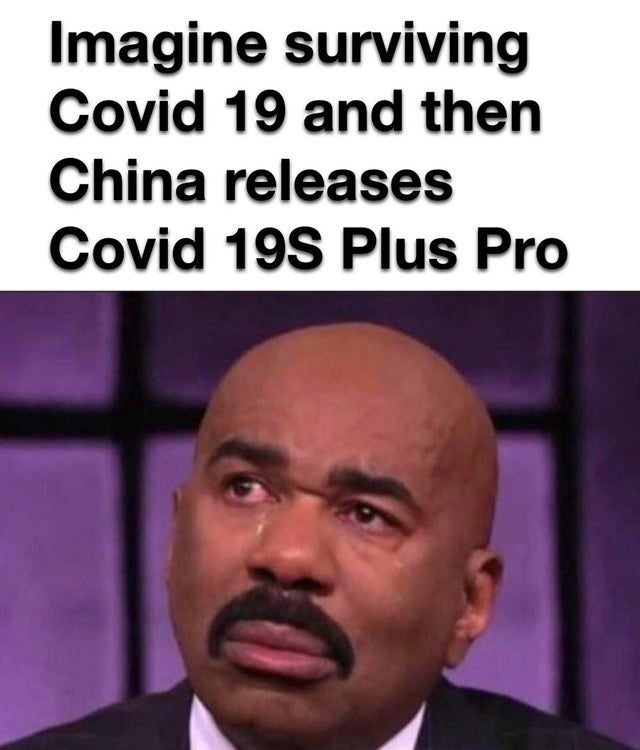